In [1]:
import sys
sys.path.append('/home/sapje1/code/python_mrobjects/qc')
import mriqc
import os
import numpy as np
import matplotlib.pyplot as plt
nii_path = 'C:\\Users\\sapje1\\data\\RoutineQA_examples'
nii_file1 = '20211111_113225WarmingUps002a001.nii'
nii_file2 = '20211111_113225GloverGSQAPs003a001.nii'

In [2]:
first_run = mriqc.FmriQc(nii_path,nii_file1,in_vivo=False)

In [3]:
first_run.calc_sfnr()

496.15895342078335


496.15895342078335

C:\Users\sapje1\code\python_mrdatamethods\qc\mriqc.py:95: RuntimeWarning: Mean of empty slice
  sig_timeseries = np.nanmean(np.nanmean(np.nanmean(masked_data, axis=3), axis=2), axis=1)


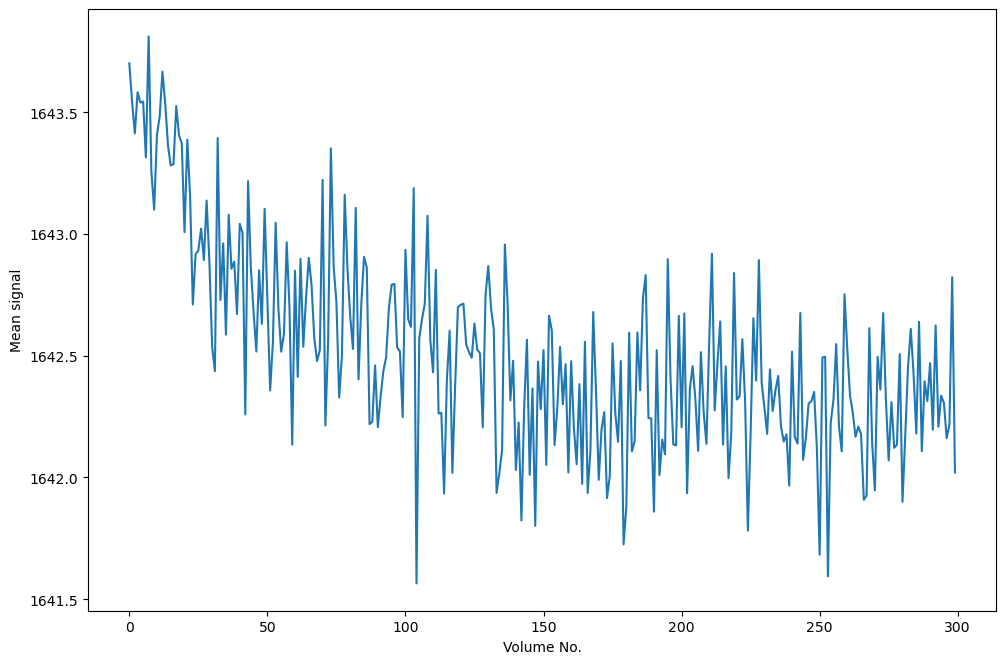

In [4]:
s1=first_run.timeseries(plot=True)

In [5]:
first_run.vol_data.shape

(300, 27, 64, 64)

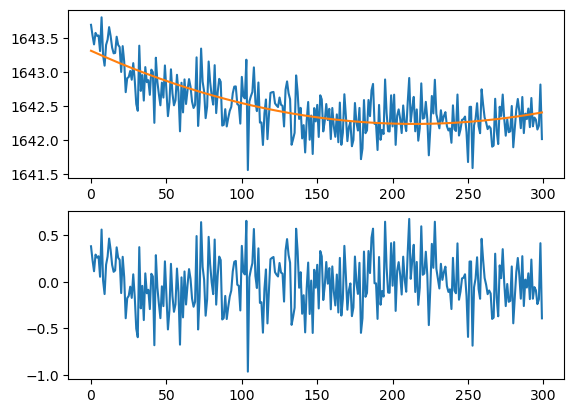

In [6]:
dr=first_run.drift_correct(correct=True,plot=True)

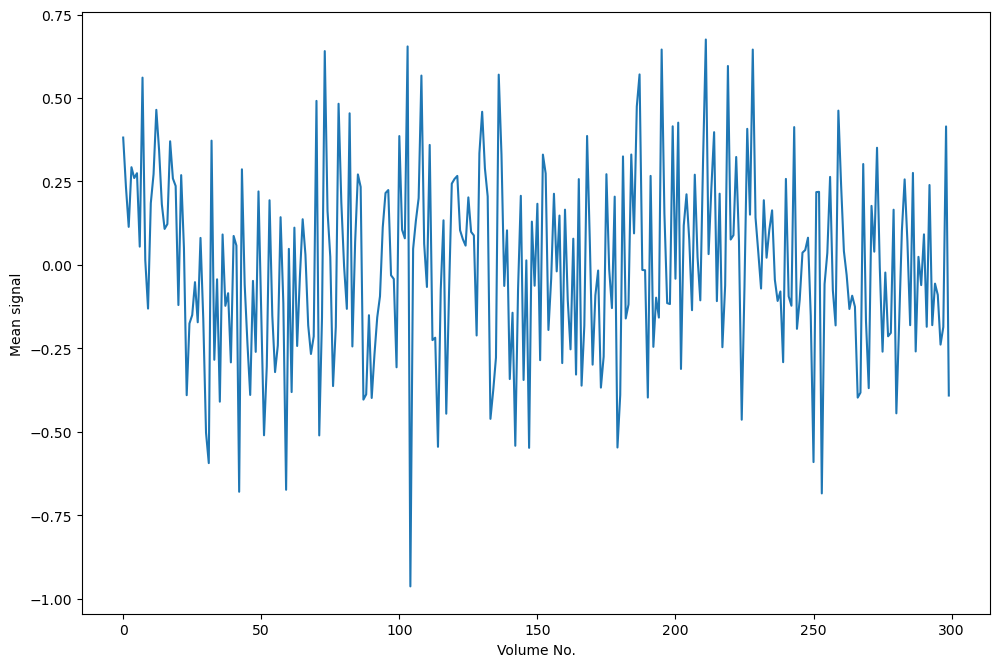

In [7]:
s2=first_run.timeseries(plot=True)

In [11]:
first_run.basic_stats()
first_run.calc_sfnr()

143.07074006306397


143.07074006306397

[13, 32, 32]

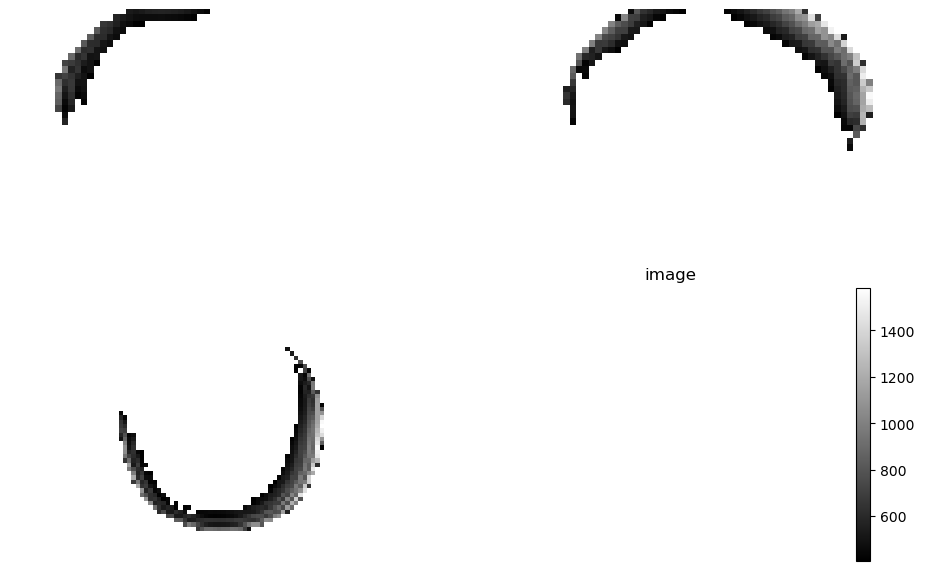

In [12]:
mriqc.ortho_view(first_run.vol_mean)

In [15]:
def calc_sfnr_by_vol(fmriqc_data):
    nvols = fmriqc_data.shape[0]
    sfnr_by_vol = []
    sfnr_by_vol.append(fmriqc_data.calc_sfnr())
    vol = []
    vol.append(nvols)
    for vv in range(nvols,5,-1):
        # this is destructive - would need to reload data to get the full dataset back
        fmriqc_data.vol_data=fmriqc_data.vol_data[0:vv,:,:,:]
        sfnr_by_vol.append(fmriqc_data.calc_sfnr())
        vol.append(vv)
    return(vol, sfnr_by_vol)

In [ ]:
[v,sfnr]=calc_sfnr_by_vol(first_run)

In [ ]:
fig=plt.figure()
ax=fig.subplots()
ax.plot(v,sfnr)
ax.set_xlabel('Volumes')
ax.set_ylabel('Estimated SFNR')

In [ ]:
second_run=mriqc.FmriQc(nii_path,nii_file2,in_vivo=False)

In [ ]:
second_run.vol_data.shape

In [ ]:
nvols = glover.vol_data.shape[0]

In [ ]:
display(nvols)

In [ ]:
sfnr_by_vol2 = []
sfnr_by_vol2.append(glover.calc_sfnr())
vol2 = []
vol2.append(nvols)

In [ ]:
for vv in range(nvols,5,-1):
    glover.vol_data=glover.vol_data[0:vv,:,:,:]
    sfnr_by_vol2.append(glover.calc_sfnr())
    vol2.append(vv)

In [ ]:
fig=plt.figure()
ax=fig.subplots()
ax.plot(vol2,sfnr_by_vol2)
ax.set_xlabel('Volumes')
ax.set_ylabel('Estimated SFNR (Glover, second run)')